# Credit card fraud detection with Machine Learning

## 0.0 Importing the necessary libraries for the project.

In [114]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

## 1.0 Reading the dataset with credit card financial transactions

In [115]:
df = pd.read_csv('..\Projects\creditcard.csv')
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
28777,35156.0,-1.234359,-0.188401,2.086447,0.425868,-0.076651,0.386863,0.455067,0.395502,0.084297,...,0.246360,0.550329,0.146569,0.217960,0.163433,-0.439377,0.082086,0.125007,142.45,0
115979,74096.0,1.463438,-0.472965,-0.258765,-0.642481,-0.510645,-0.586999,-0.252329,-0.232319,-0.714744,...,-0.506132,-0.855800,-0.106885,-0.400641,0.539617,1.144086,-0.071170,-0.010712,7.50,0
139706,83303.0,1.043529,-0.847627,1.255298,0.660119,-1.460708,0.427092,-1.108972,0.382007,-0.451760,...,-0.269046,-0.383555,0.087558,0.137255,0.069413,-0.398957,0.083806,0.040451,74.00,0
228648,145598.0,-1.288401,0.163524,0.363956,-0.843038,0.691945,-0.552690,0.456903,0.416786,-0.344663,...,0.056296,-0.143836,-0.153402,-0.461960,0.158744,-0.086700,-0.043912,-0.054320,60.00,0
181230,124883.0,1.918942,-0.121591,-1.418867,0.191829,0.671690,0.215519,0.083174,-0.009963,0.444789,...,0.347717,1.306811,0.067210,-0.969726,0.068689,-0.014817,0.037924,-0.066467,12.10,0
213267,139183.0,-0.933163,-0.892280,0.098218,-3.014270,-0.085727,-0.390387,-0.517506,0.427512,-2.461812,...,0.063696,0.167436,-0.210814,-1.050653,0.076712,-0.170148,-0.008082,-0.036800,54.80,0
284452,172457.0,-0.573867,1.366669,0.011422,-0.802875,0.854542,-0.840976,1.586824,-0.790326,0.839547,...,0.158800,1.529256,-0.200525,0.057727,-0.700060,-0.307772,0.449711,-0.109000,10.12,0
72300,54648.0,0.113004,-1.622425,-0.613400,1.528273,-0.611153,-0.188046,0.903333,-0.170264,-0.047721,...,0.333422,-0.258916,-0.698944,0.032007,0.618291,-0.332058,-0.108286,0.098335,578.54,0
145710,87147.0,-1.316784,1.004233,-1.337957,-2.649033,1.353024,-1.476489,1.361034,-1.170352,0.827085,...,0.750166,0.551511,0.169830,0.741903,-0.138502,0.487574,0.245109,-0.190020,1.00,0
275762,166712.0,-6.012311,3.172411,-1.894695,0.750444,-2.586855,-0.201284,-2.642647,1.839084,-0.123774,...,1.215500,-2.183374,-0.160850,-0.159911,0.714777,-0.976829,-0.729001,-0.361542,9.54,0


### 1.1 Checking the number of rows and columns that the dataset has.

In [116]:
df.shape

(284807, 31)

### 1.2 Checking the type of each column of the dataset in order to verify how many columns I should apply or not the command replace or one hot coding to run a Machine Learning model.

In [117]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

### 1.3 Checking NA values

In [118]:
(df.isna().sum() / len(df['Class'])*100).round(2)

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

### 1.4 Handling duplicated values

In [119]:
#Checking duplicated values
df.duplicated(keep=False).value_counts()

False    282953
True       1854
dtype: int64

In [120]:
# Selecting the duplicate rows except first occurrence based on all columns
df_duplicated = df[df.duplicated(keep=False)]
print("Duplicate Rows except will be marked as True occurrence based on all columns are :")
print(df_duplicated)

Duplicate Rows except will be marked as True occurrence based on all columns are :
            Time        V1        V2        V3        V4        V5        V6  \
32          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
33          26.0 -0.529912  0.873892  1.347247  0.145457  0.414209  0.100223   
34          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
35          26.0 -0.535388  0.865268  1.351076  0.147575  0.433680  0.086983   
112         74.0  1.038370  0.127486  0.184456  1.109950  0.441699  0.945283   
...          ...       ...       ...       ...       ...       ...       ...   
283485  171627.0 -1.457978  1.378203  0.811515 -0.603760 -0.711883 -0.471672   
284190  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284191  172233.0 -2.667936  3.160505 -3.355984  1.007845 -0.377397 -0.109730   
284192  172233.0 -2.691642  3.123168 -3.339407  1.017018 -0.293095 -0.167054   
284193  172233.0 -2.691642  3.123168 

In [121]:
#Cleaning the duplicated values
df.drop_duplicates(keep=False, inplace=True)
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
177079,123029.0,-0.697937,-0.867479,0.160512,-2.848957,-0.925567,1.935809,1.114770,0.279775,-0.675752,...,0.270883,0.756688,0.410188,-1.671816,-1.388001,-0.684357,0.313442,0.116342,380.00,0
136457,81712.0,1.158415,0.284109,0.121065,1.023737,-0.110891,-0.302387,-0.081543,-0.021580,0.420045,...,-0.140397,-0.074189,-0.078342,0.055818,0.511827,0.436941,0.024958,0.042073,12.31,0
150228,92841.0,1.978182,-0.040300,-0.619977,0.551770,-0.458699,-0.893668,-0.537212,-0.148310,2.609133,...,-0.407273,-0.778139,0.388502,-0.213869,-0.550721,-0.318254,-0.001887,-0.015979,10.00,0
259412,159104.0,0.133450,1.014999,-0.393897,-0.538124,0.906367,-0.778811,0.952508,-0.078234,-0.026218,...,-0.334876,-0.818373,0.110596,0.565292,-0.446446,0.115566,0.224203,0.083879,3.87,0
218415,141306.0,-0.213017,-0.538459,1.707118,-1.932573,-0.376543,1.035007,-0.901102,0.496581,-0.077430,...,0.253863,0.870637,-0.144007,0.127922,-0.565280,-0.281746,0.220453,0.183866,5.00,0
117242,74598.0,0.716204,-0.244843,0.828125,2.722778,-0.443235,0.528229,-0.024148,0.255470,-0.492249,...,-0.098137,-0.598779,-0.018801,0.185738,0.162106,-0.196672,-0.014616,0.044150,179.00,0
26348,34019.0,-0.683466,0.106814,2.142179,-1.730025,-0.474579,-1.019831,0.020136,-0.031391,-1.274680,...,0.160671,0.214983,-0.260126,0.379673,0.358768,-0.360515,0.025486,0.064283,2.50,0
33674,37333.0,-0.663618,1.372843,0.570650,-0.086483,0.147765,-0.497958,0.503348,0.332874,-0.688813,...,-0.247793,-0.761648,-0.015839,-0.492242,0.024610,0.122276,0.117699,0.031075,30.00,0
281931,170539.0,1.921440,-1.234405,-1.748963,-1.089485,-0.217606,-0.253579,-0.315847,-0.178056,-0.804574,...,0.564234,1.261019,-0.176656,0.298907,0.180455,0.037961,-0.068081,-0.045769,164.70,0
106639,70051.0,1.359050,-0.472358,-0.012378,-0.635864,-0.621410,-0.531910,-0.250085,-0.186387,-1.179024,...,-0.399709,-0.564093,-0.081861,0.076490,0.473407,1.090330,-0.069510,-0.011094,20.97,0


In [122]:
df.duplicated(keep=False).value_counts()

False    282953
dtype: int64

### 1.5 Checking the correlation among the variables

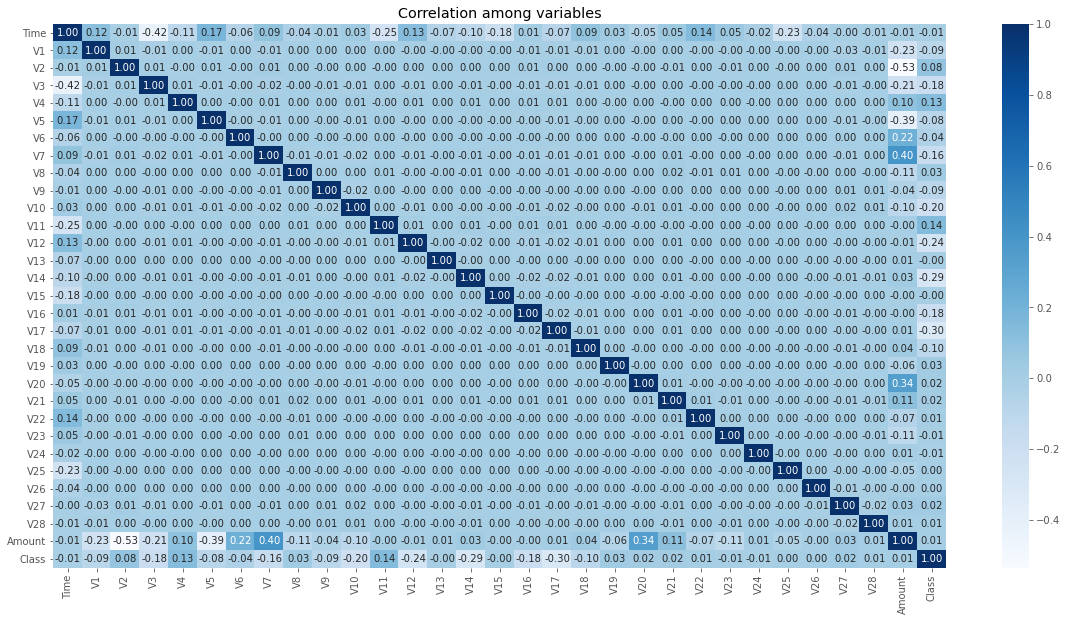

In [123]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')
plt.title('Correlation among variables')
plt.show()

## 2.0 Ploting the distribution of feature "Class"

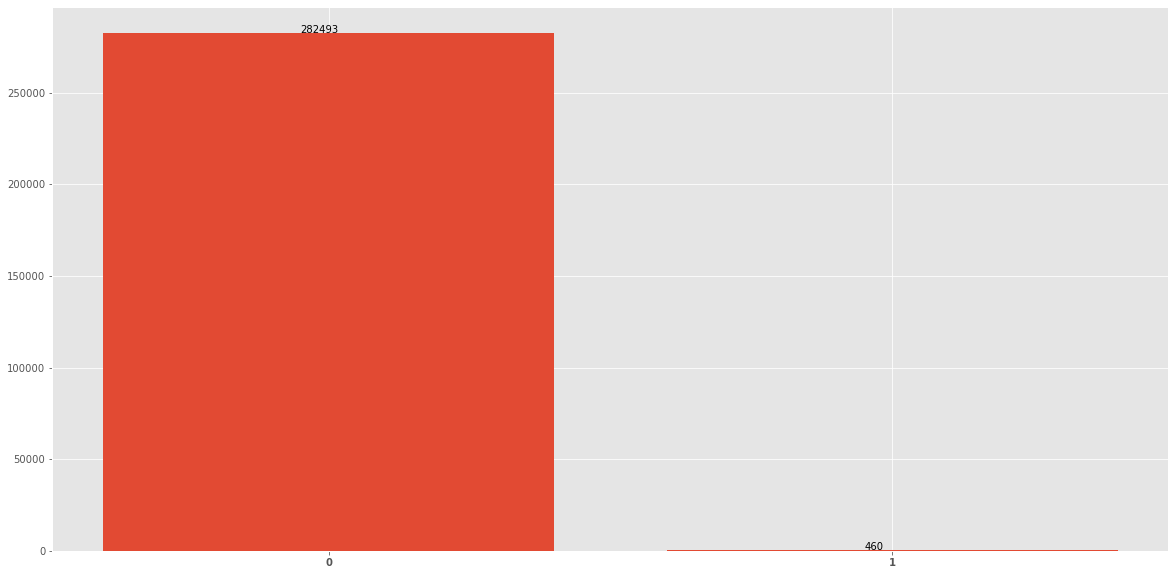

In [124]:
#Create axis
height = df.groupby('Class')['Class'].count().values
bars = df.groupby('Class')['Class'].count().index
y_pos = np.arange(len(bars))

#Create bars
plt.bar(y_pos, height)

#Create texts in chart
for i in range (0,len(y_pos)):
    plt.text(x = i -0.05, y = height[i], s = height[i], size = 10)
    
#Create names on the x-axis
plt.xticks(y_pos, bars, fontweight='bold', fontsize='10')

#Show graphic
plt.show()

###### Total rows in the dataset with fraud and non-fraud.


###### As we have a very unbalanced dateset (image above) it is necessary to balance the data to create the Machine Learning model.

###### The base has about 460 cases of fraud, so we will select that same number of normal transaction lines and create a balanced dataset (or take a sample).

In [125]:
#Get 460 values of each Class (0 and 1)
df_balanced = pd.concat([df[df['Class'] ==0][0:460], df[df['Class']==1][0:460]])

### 3.0 Separating the dateset between training base (X) and target (y).

In [126]:
# Apply x and y to train model
y = df_balanced['Class']
x = df_balanced.drop(['Class'], axis=1)

### 3.1 Training and testing the model

In [127]:
#Creating a function to check what is the best Classification model in Machine Learning
def classificationModels (a, b):
    from sklearn.linear_model import LogisticRegression
    from sklearn.naive_bayes import GaussianNB
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.model_selection import StratifiedKFold
    from sklearn.model_selection import cross_val_score
    from sklearn.ensemble import GradientBoostingClassifier
    skfold = StratifiedKFold(n_splits=5)
    from sklearn.ensemble import GradientBoostingClassifier
    x = a
    y = b
    
    #Standardizing predictor variables for KNN:
  
    standarder = MinMaxScaler(feature_range = (0,1))
    x_norm = standarder.fit_transform(x)
    
    logist = LogisticRegression(penalty = 'l2', solver='liblinear', max_iter=187)
    naive = GaussianNB()
    decision_tree =  DecisionTreeClassifier()
    knn = KNeighborsClassifier() 
    stratifiedKfold = StratifiedKFold(n_splits=10)
    gbc = GradientBoostingClassifier()
    
    resul_logist = cross_val_score(logist,x,y,cv=skfold, n_jobs=-1)
    resul_naive = cross_val_score(naive,x,y,cv=skfold, n_jobs=-1)
    resul_decision_tree = cross_val_score(decision_tree,x,y,cv=skfold, n_jobs=-1)
    resul_knn = cross_val_score(knn,x_norm,y,cv=skfold, n_jobs=-1)
    resul_gbc = cross_val_score(gbc,x,y,cv=skfold,n_jobs=-1)
    
    
    dic_classmodels = {'Logistic Regression': resul_logist.mean(), 'Naive': resul_naive.mean(), 'Decision Tree': resul_decision_tree.mean(), 'KNN': resul_knn.mean(), 'Gradient Boosting Classifier': resul_gbc.mean(),}
    best_model = max(dic_classmodels, key=dic_classmodels.get)
    print('Logistic Regression:', resul_logist.mean(), 'Naive:', resul_naive.mean(), 'Decision Tree:', resul_decision_tree.mean(), 'KNN:', resul_knn.mean(), 'Gradient Boosting Classifier:', resul_gbc.mean())
    print('The best model was', best_model, 'with the score:', (dic_classmodels[best_model]*100).round(2), "%")

In [128]:
classificationModels(x,y)

Logistic Regression: 0.8391304347826086 Naive: 0.9967391304347826 Decision Tree: 0.9489130434782609 KNN: 0.9804347826086957 Gradient Boosting Classifier: 0.9489130434782609
The best model was Naive with the score: 99.67 %


## 4.1 Conclusion

###### Although the dataset omits the information in its raw form, this is not an impediment to creating the predictive model. This dataset comes in a very user-friendly way to work with data, which makes some of the work of a data scientist a lot easier.